In [13]:
import os
import pandas as pd
import numpy as np

import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
mouse_human_conversion = pd.read_excel('/home/jing/Phd_project/project_UCD_blca/blca_publication/blca_publication_Scripts/blca_Scripts_fgfr/idmap.xlsx')

In [4]:
mouse_human_conversion

,query,entrezgene,name,symbol,alias,taxid,MGI
0,ABCA9,217262.0,"ATP-binding cassette, sub-family A member 9",Abca9,D630040K07Rik,10090.0,MGI:2386796
1,ABCB7,11306.0,"ATP-binding cassette, sub-family B member 7",Abcb7,Abc7,10090.0,MGI:109533
2,ACPP,56318.0,acid phosphatase 3,Acp3,"5'-NT, A030005E02Rik, Acpp, FRAP, Lap",10090.0,MGI:1928480
3,ACSBG1,94180.0,acyl-CoA synthetase bubblegum family member 1,Acsbg1,"BG1, Bgm, E230019G03Rik, GR-LACS, Lpd",10090.0,MGI:2385656
4,ADAMTSL1,77739.0,ADAMTS-like 1,Adamtsl1,"5930437A14Rik, 6720426B09Rik, ADAMTSL-1",10090.0,MGI:1924989
...,...,...,...,...,...,...,...
162,TPCN1,252972.0,two pore channel 1,Tpcn1,"5730403B01Rik, Tpc1, mKIAA1169",10090.0,MGI:2182472
163,UGT2B35,243085.0,"UDP glucuronosyltransferase 2 family, polypept...",Ugt2b35,C730031G17,10090.0,MGI:3576100
164,VSIR,74048.0,V-set immunoregulatory receptor,Vsir,"4632428N05Rik, Dies1, PD-1H, VISTA",10090.0,MGI:1921298
165,WFDC1,67866.0,WAP four-disulfide core domain 1,Wfdc1,"2310058A03Rik, ps20",10090.0,MGI:1915116


In [60]:
logfold_df = pd.read_excel('/home/jing/Phd_project/project_UCD_blca/blca_publication/blca_publication_Scripts/blca_Scripts_fgfr/GEO36273937_logfold.xlsx',sheet_name='LIMMA_DEGs_Tum_vs_Nurothelium',
                           header=1,index_col=0)

#LIMMA_DEGs_Hyper_vs_Nurothelium'

In [61]:
logfold_df

,GeneID,logFC,AveExpr,t,P.Value,adj.P.Val
Probeset_ID,,,,,,
208898_at,Unc13c,-1.660587,5.812548,-14.538125,9.596314e-08,0.001617
94180_at,Acsbg1,2.271875,9.639502,13.640567,1.701510e-07,0.001617
269959_at,Adamtsl3,-1.409333,6.019062,-13.498104,1.869326e-07,0.001617
243085_at,Ugt2b35,-1.773383,4.703899,-12.597547,3.462226e-07,0.001617
56318_at,Acpp,-2.465987,7.000826,-12.520507,3.656356e-07,0.001617
...,...,...,...,...,...,...
382156_at,Fbxw22,-0.742282,4.889858,-4.319483,1.759746e-03,0.049731
19108_at,Prkx,0.642138,10.832475,4.319366,1.760057e-03,0.049731
76142_at,Ppp1r14c,0.681998,6.876813,4.317441,1.765160e-03,0.049737


In [62]:
logfold_df= logfold_df.merge(mouse_human_conversion[['query','symbol']],left_on='GeneID',right_on='symbol',how='left')

In [63]:
logfold_df

,GeneID,logFC,AveExpr,t,P.Value,adj.P.Val,query,symbol
0,Unc13c,-1.660587,5.812548,-14.538125,9.596314e-08,0.001617,NaN,NaN
1,Acsbg1,2.271875,9.639502,13.640567,1.701510e-07,0.001617,ACSBG1,Acsbg1
2,Adamtsl3,-1.409333,6.019062,-13.498104,1.869326e-07,0.001617,ADAMTSL3,Adamtsl3
3,Ugt2b35,-1.773383,4.703899,-12.597547,3.462226e-07,0.001617,UGT2B35,Ugt2b35
4,Acpp,-2.465987,7.000826,-12.520507,3.656356e-07,0.001617,NaN,NaN
...,...,...,...,...,...,...,...,...
984,Fbxw22,-0.742282,4.889858,-4.319483,1.759746e-03,0.049731,NaN,NaN
985,Prkx,0.642138,10.832475,4.319366,1.760057e-03,0.049731,NaN,NaN
986,Ppp1r14c,0.681998,6.876813,4.317441,1.765160e-03,0.049737,NaN,NaN
987,Mapk6,0.693113,10.184977,4.316899,1.766601e-03,0.049737,NaN,NaN


In [64]:
logfold_df.dropna(inplace=True)

In [65]:
logfold_df

,GeneID,logFC,AveExpr,t,P.Value,adj.P.Val,query,symbol
1,Acsbg1,2.271875,9.639502,13.640567,1.701510e-07,0.001617,ACSBG1,Acsbg1
2,Adamtsl3,-1.409333,6.019062,-13.498104,1.869326e-07,0.001617,ADAMTSL3,Adamtsl3
3,Ugt2b35,-1.773383,4.703899,-12.597547,3.462226e-07,0.001617,UGT2B35,Ugt2b35
7,Fmod,-1.918295,6.744980,-12.295507,4.295386e-07,0.001617,FMOD,Fmod
10,Dlc1,-1.362206,7.889044,-11.540767,7.521254e-07,0.001718,DLC1,Dlc1
...,...,...,...,...,...,...,...,...
847,Nsg1,-0.939931,6.819877,-4.584489,1.187093e-03,0.040145,NSG1,Nsg1
866,Npr2,-1.902868,7.966943,-4.540107,1.267103e-03,0.041790,NPR2,Npr2
915,Tcf21,-3.256374,8.444172,-4.450824,1.446009e-03,0.044733,TCF21,Tcf21
916,Ppp1r14a,-1.539757,8.089724,-4.447390,1.453406e-03,0.044918,PPP1R14A,Ppp1r14a


In [66]:
#Depmap
blca= pd.read_csv('/home/jing/Phd_project/project_UCD_blca/blca_DATA/blca_DATA_depmep/OmicsExpressionProteinCodingGenesTPMLogp1.csv',index_col=0)

In [67]:
blca

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,H3C2 (8358),H3C3 (8352),AC098582.1 (8916),DUS4L-BCAP29 (115253422),C8orf44-SGK3 (100533105),ELOA3B (728929),NPBWR1 (2831),ELOA3D (100506888),ELOA3 (162699),CDR1 (1038)
ACH-001113,4.331992,0.000000,7.364660,2.792855,4.471187,0.028569,1.226509,3.044394,6.500005,4.739848,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.000000,0.275007,0.0,0.000000,0.000000
ACH-001289,4.567424,0.584963,7.106641,2.543496,3.504620,0.000000,0.189034,3.813525,4.221877,3.481557,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.000000,0.014355,0.0,0.000000,0.000000
ACH-001339,3.150560,0.000000,7.379118,2.333424,4.228049,0.056584,1.310340,6.687201,3.682573,3.273516,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.000000,0.084064,0.0,0.000000,0.042644
ACH-001538,5.085340,0.000000,7.154211,2.545968,3.084064,0.000000,5.868390,6.165309,4.489928,3.956986,...,0.214125,0.632268,0.298658,1.641546,0.443607,0.000000,0.028569,0.0,0.000000,0.000000
ACH-000242,6.729417,0.000000,6.537917,2.456806,3.867896,0.799087,7.208478,5.570159,7.127117,4.568032,...,1.117695,2.358959,0.084064,1.910733,0.000000,0.000000,0.464668,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,0.000000,6.604368,3.266037,4.973152,0.411426,0.097611,0.704872,4.829850,5.178715,...,2.229588,0.084064,1.310340,3.039138,0.344828,0.000000,0.000000,0.0,0.475085,0.042644
ACH-002669,3.111031,0.000000,7.031329,1.541019,3.664483,0.014355,3.624101,6.805421,4.472488,4.397118,...,0.189034,0.400538,0.356144,1.327687,0.000000,0.000000,0.014355,0.0,0.000000,0.000000
ACH-001858,4.390943,0.000000,7.013239,1.887525,3.252476,0.028569,3.286881,6.902194,5.410748,3.401903,...,1.097611,0.400538,0.613532,1.992768,0.704872,0.000000,1.464668,0.0,0.000000,0.526069
ACH-001997,5.057450,0.000000,7.815191,2.538538,3.893362,0.028569,4.079805,6.971659,4.469886,3.463361,...,0.831877,0.847997,1.292782,2.153805,0.687061,0.000000,0.000000,0.0,0.000000,0.000000


In [68]:
blca.columns = [re.sub(r'\s*\(.*?\)', '', s) for s in list(blca.columns)]

In [69]:
blca

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,H3C2,H3C3,AC098582.1,DUS4L-BCAP29,C8orf44-SGK3,ELOA3B,NPBWR1,ELOA3D,ELOA3,CDR1
ACH-001113,4.331992,0.000000,7.364660,2.792855,4.471187,0.028569,1.226509,3.044394,6.500005,4.739848,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.000000,0.275007,0.0,0.000000,0.000000
ACH-001289,4.567424,0.584963,7.106641,2.543496,3.504620,0.000000,0.189034,3.813525,4.221877,3.481557,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.000000,0.014355,0.0,0.000000,0.000000
ACH-001339,3.150560,0.000000,7.379118,2.333424,4.228049,0.056584,1.310340,6.687201,3.682573,3.273516,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.000000,0.084064,0.0,0.000000,0.042644
ACH-001538,5.085340,0.000000,7.154211,2.545968,3.084064,0.000000,5.868390,6.165309,4.489928,3.956986,...,0.214125,0.632268,0.298658,1.641546,0.443607,0.000000,0.028569,0.0,0.000000,0.000000
ACH-000242,6.729417,0.000000,6.537917,2.456806,3.867896,0.799087,7.208478,5.570159,7.127117,4.568032,...,1.117695,2.358959,0.084064,1.910733,0.000000,0.000000,0.464668,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,0.000000,6.604368,3.266037,4.973152,0.411426,0.097611,0.704872,4.829850,5.178715,...,2.229588,0.084064,1.310340,3.039138,0.344828,0.000000,0.000000,0.0,0.475085,0.042644
ACH-002669,3.111031,0.000000,7.031329,1.541019,3.664483,0.014355,3.624101,6.805421,4.472488,4.397118,...,0.189034,0.400538,0.356144,1.327687,0.000000,0.000000,0.014355,0.0,0.000000,0.000000
ACH-001858,4.390943,0.000000,7.013239,1.887525,3.252476,0.028569,3.286881,6.902194,5.410748,3.401903,...,1.097611,0.400538,0.613532,1.992768,0.704872,0.000000,1.464668,0.0,0.000000,0.526069
ACH-001997,5.057450,0.000000,7.815191,2.538538,3.893362,0.028569,4.079805,6.971659,4.469886,3.463361,...,0.831877,0.847997,1.292782,2.153805,0.687061,0.000000,0.000000,0.0,0.000000,0.000000


In [70]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= blca.loc[cell_line_ids]


In [71]:
#dot product
blca_lm=blca[blca.columns.intersection(logfold_df['query'].values)]
display(blca_lm)

,ADGRA2,MYOC,SOAT1,NTN1,TGFBR3,IPCEF1,FGFR1,REM1,P2RX7,ISM1,...,BHLHA15,OLFML1,TPCN1,TLE1,ANXA4,MAFB,TCEA3,EBF2,SPRR2F,FXYD1
ACH-001113,0.310340,0.000000,4.635174,0.910733,3.936402,0.028569,4.413459,0.000000,0.344828,0.042644,...,0.333424,0.028569,3.691534,3.727920,5.460087,4.043519,3.032101,0.042644,0.000000,1.480265
ACH-001289,0.536053,0.042644,4.298658,7.566206,2.097611,2.014355,8.534264,0.000000,0.056584,0.028569,...,1.827819,3.795975,1.599318,3.867896,5.842225,0.014355,0.485427,0.238787,0.000000,0.344828
ACH-001339,2.166715,0.659925,4.249445,0.111031,3.272023,0.042644,2.513491,1.475085,4.223423,0.189034,...,0.111031,0.056584,3.275007,3.792855,5.487679,0.731183,0.238787,0.056584,0.000000,1.443607
ACH-001538,0.163499,0.000000,3.451541,0.000000,1.150560,0.731183,0.084064,0.000000,0.124328,1.963474,...,0.505891,0.000000,4.319040,4.032982,5.092123,0.176323,3.273516,0.000000,0.400538,0.000000
ACH-000242,0.084064,0.000000,3.226509,0.150560,4.971314,0.985500,0.356144,0.000000,0.028569,0.163499,...,0.028569,0.097611,5.126395,4.780310,6.092123,0.565597,0.137504,0.000000,0.000000,0.084064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.176323,0.000000,4.456149,0.464668,0.176323,0.028569,0.505891,0.000000,0.214125,0.000000,...,0.400538,0.310340,5.372952,4.633431,0.963474,0.000000,0.056584,0.028569,0.000000,1.510962
ACH-002669,0.815575,0.000000,3.732269,1.304511,0.604071,0.042644,1.195348,0.000000,0.084064,0.863938,...,1.933573,0.028569,3.775051,4.142413,5.722739,0.084064,3.798051,0.000000,0.000000,0.584963
ACH-001858,0.641546,0.000000,4.559492,0.028569,1.395063,0.014355,4.874797,0.014355,0.910733,0.014355,...,0.250962,0.000000,5.701272,6.050937,5.572283,0.056584,0.475085,2.035624,0.000000,0.000000
ACH-001997,0.042644,0.000000,2.976364,0.056584,1.405992,0.000000,0.014355,0.000000,0.163499,0.014355,...,0.124328,0.000000,3.990047,5.159871,7.353676,0.000000,0.042644,0.000000,0.000000,0.070389


In [72]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)

In [73]:
DPD_df

,invasiveness
ACH-001113,0.0
ACH-001289,0.0
ACH-001339,0.0
ACH-001538,0.0
ACH-000242,0.0
...,...
ACH-000285,0.0
ACH-002669,0.0
ACH-001858,0.0
ACH-001997,0.0


In [74]:
vector = logfold_df[['query','logFC']]
vector.set_index('query',inplace=True)
vector= vector.loc[blca.columns.intersection(logfold_df['query'].values)]

In [75]:
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], vector.loc[:, 'logFC'])

display(DPD_df)

,invasiveness
ACH-001113,-143.538467
ACH-001289,-183.784108
ACH-001339,-173.320454
ACH-001538,-93.455568
ACH-000242,-116.856270
...,...
ACH-000285,-89.454437
ACH-002669,-113.632540
ACH-001858,-158.769753
ACH-001997,-90.367655


In [76]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']


In [77]:
DPD_cell_lines

,invasiveness,cell_line_name
ACH-000142,-137.244719,CAL29
ACH-000593,-145.950904,BC3C
ACH-000396,-158.354899,J82
ACH-000242,-116.856270,RT4
ACH-000384,-122.446398,SW780
ACH-000018,-122.575912,T24
ACH-000724,-159.888360,HT1376


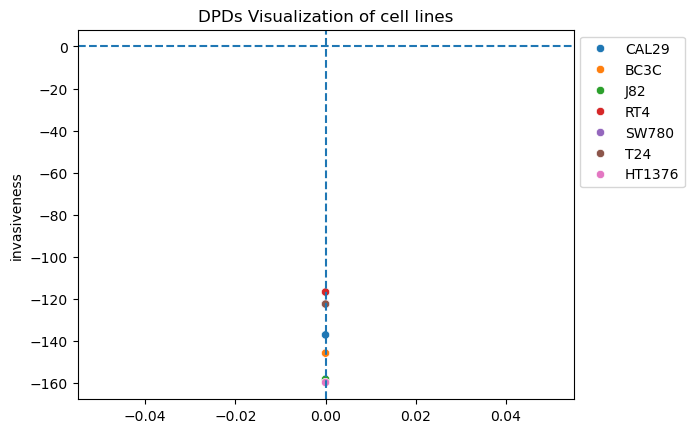

In [78]:
sns.scatterplot(DPD_cell_lines,x=np.zeros(7),y='invasiveness',hue='cell_line_name')
plt.axvline(x=0,linestyle='--')
plt.axhline(y=0,linestyle='--')
plt.title("DPDs Visualization of cell lines")
plt.legend(bbox_to_anchor=(1,0, 0,1))

#plt.xlabel('DPD_N/MIBC')
#plt.savefig("/Users/lidiayung/Downloads/DPD_sct_lincs_healthy_onc.png",dpi=300)
